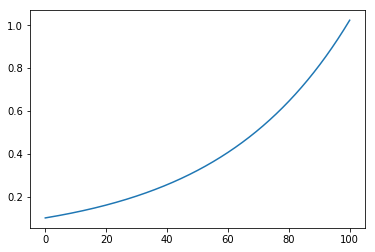

In [1]:
import numpy as np
import json

with open('data/HICO/HAKE/Part_State_76.txt', 'r') as f:
    lines = f.readlines()
part_labels = [l.strip() for l in lines]
part_action_pairs = []
part_action_dict = {}
for l in lines:
    pa_pair = [x.strip() for x in l.split(':')]
    part, action = pa_pair
    part_action_pairs.append(pa_pair)
    part_action_dict.setdefault(part, []).append(action)
actions = sorted({v for vs in part_action_dict.values() for v in vs})
parts = sorted(part_action_dict.keys())

hico_parts_train = json.load(open('data/HICO/HAKE/train.json', 'r'))


In [1]:
import numpy as np
import pickle

embs = pickle.load(open('cache/glove_300_act_norm-avg.pkl', 'rb'))
sim = embs @ embs.T
out = np.array([7, 17, 21, 25, 38, 50])

x, y = np.where(sim - np.eye(sim.shape[0]) >= 0.6)

inds = sorted({i for i, n in enumerate(x) if n not in out} &
              {i for i, n in enumerate(y) if n not in out})
x = x[inds]
y = y[inds]
print(np.stack([x, y], axis=1))
        

[[ 55 108]
 [ 57  71]
 [ 66  67]
 [ 67  66]
 [ 71  57]
 [ 86  87]
 [ 86  93]
 [ 86  97]
 [ 87  86]
 [ 87  93]
 [ 87  94]
 [ 87 101]
 [ 87 103]
 [ 87 109]
 [ 93  86]
 [ 93  87]
 [ 93  94]
 [ 93 101]
 [ 93 103]
 [ 93 109]
 [ 94  87]
 [ 94  93]
 [ 97  86]
 [101  87]
 [101  93]
 [101 103]
 [101 109]
 [103  87]
 [103  93]
 [103 101]
 [103 109]
 [108  55]
 [109  87]
 [109  93]
 [109 101]
 [109 103]]


In [17]:
import numpy as np
import torch
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad)

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] = 2342
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] -= 9
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.]], grad_fn=<PowBackward0>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[   0.,    1.],
        [   4., 2342.],
        [  16.,   25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  0.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  0.],
        [16., 25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])


In [16]:
import numpy as np
import torch
n = 5
x0 = torch.tensor(torch.from_numpy(np.arange(n*2).reshape(n, 2)).float(),requires_grad=True)
a_inds = torch.from_numpy(np.array([0, 3, 4]))
b_inds = torch.from_numpy(np.array([i for i in range(n) if i not in a_inds]))
a = x0[a_inds, :].detach()
b = x0[b_inds, :]
x = torch.cat([a, b], dim=0)[torch.sort(torch.cat([a_inds, b_inds]))[1]]
print((x0 == x).all())
y = x**2
z = y.sum()
z.backward()
print(a.requires_grad, b.requires_grad, x.requires_grad)
print(x0) 
print(x) 
print(y) 
print(y.grad)
print(x.grad)
print(a.grad)
print(b.grad)
print(x0.grad)

tensor(1, dtype=torch.uint8)
False True True
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], requires_grad=True)
tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]], grad_fn=<TakeBackward>)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.],
        [36., 49.],
        [64., 81.]], grad_fn=<PowBackward0>)
None
None
None
None
tensor([[ 0.,  0.],
        [ 4.,  6.],
        [ 8., 10.],
        [ 0.,  0.],
        [ 0.,  0.]])


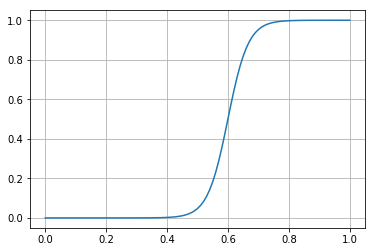

In [32]:
import numpy as np
from matplotlib import pyplot as plt

n = 100
x = np.arange(n + 1) / n

w, k = 30, 18
T = 1 + np.exp(k - w).item()
y = T / (1 + np.exp(-(w * x - k)))

plt.plot(x, y)
plt.grid()
plt.show()


In [1]:
with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
               for l in f.readlines()]
print(inet_categories[0])
print(inet_categories[1])
print(inet_categories[-2])
print(inet_categories[-1])

from lib.detection.wrappers import COCO_CLASSES
print(COCO_CLASSES)

common = set(COCO_CLASSES.values()) & {c for cat in inet_categories for c in cat}
print(len(common))   


['tench', 'Tinca tinca']
['goldfish', 'Carassius auratus']
['ear', 'spike', 'capitulum']
['toilet tissue', 'toilet paper', 'bathroom tissue']
{0: '__background__', 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'backpack', 26: 'umbrella', 27: 'handbag', 28: 'tie', 29: 'suitcase', 30: 'frisbee', 31: 'skis', 32: 'snowboard', 33: 'sports ball', 34: 'kite', 35: 'baseball bat', 36: 'baseball glove', 37: 'skateboard', 38: 'surfboard', 39: 'tennis racket', 40: 'bottle', 41: 'wine glass', 42: 'cup', 43: 'fork', 44: 'knife', 45: 'spoon', 46: 'bowl', 47: 'banana', 48: 'apple', 49: 'sandwich', 50: 'orange', 51: 'broccoli', 52: 'carrot', 53: 'hot dog', 54: 'pizza', 55: 'donut', 56: 'cake', 57: 'chair', 58: 'couch

In [ ]:
import pickle
import numpy as np
to_filter = [19, 25, 117, 144, 151, 152, 154, 163, 167, 
             190, 245, 258, 307, 326, 347, 366, 400, 
             433, 434, 466, 471, 476, 479, 523, 598]
keep = set(range(600)) - set(to_filter)
d = {'train': {'inter': np.array(sorted(keep))
               }
     }
with open('zero-shot_inds/seen_inds_2.pkl.push', 'wb') as f:
    pickle.dump(d, f)
    
    

In [7]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

all_num_inters = []
all_data = []
for i in range(10**5):
    np.random.seed(i)
    seen_obj = np.random.choice(np.array(list(hico_only)), 
                                size=num_seen_obj - len(common) - 1, replace=False)
    seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
    assert hico.human_class in seen_obj
    
    seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
    seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))
    
    num_inters = (hico.op_pair_to_interaction[seen_obj, :][:, seen_act] >= 0).sum()
    all_num_inters.append(num_inters)
    all_data.append([seen_obj, seen_act])

m = np.argmax(np.array(all_num_inters))
num_inters = all_num_inters[m]
seen_obj, seen_act = all_data[m]
u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_3.pkl.push', 'wb') as f:
    pickle.dump(d, f)


22


In [33]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

np.random.seed(42)
seen_obj = np.random.choice(np.array(list(hico_only)), 
                            size=num_seen_obj - len(common) - 1, replace=False)
seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
assert hico.human_class in seen_obj

seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))

u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_4.pkl.push', 'wb') as f:
    pickle.dump(d, f)


22


In [35]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

all_num_inters = []
all_data = []
for i in range(10**5):
    np.random.seed(i)
    seen_obj = np.random.choice(np.array(list(hico_only)), 
                                size=num_seen_obj - len(common) - 1, replace=False)
    seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
    assert hico.human_class in seen_obj
    
    seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
    seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))
    
    num_inters = (hico.op_pair_to_interaction[seen_obj, :][:, seen_act] >= 0).sum()
    all_num_inters.append(num_inters)
    all_data.append([seen_obj, seen_act])

m = np.argmin(np.array(all_num_inters))
num_inters = all_num_inters[m]
seen_obj, seen_act = all_data[m]
u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_5.pkl.push', 'wb') as f:
    pickle.dump(d, f)

22


In [7]:
import pickle
from lib.dataset.hico import Hico
from lib.dataset.utils import Splits
import numpy as np

fnum = 0
d = pickle.load(open(f'zero-shot_inds/seen_inds_{fnum}.pkl.push', 'rb'))
pinds = d['train']['act']
oinds = d['train']['obj']

hd = Hico()
print(len(oinds), len(pinds), 
      (hd.op_pair_to_interaction[oinds, :][:, pinds] >= 0).sum())

null_interactions = np.array(sorted(set(
    np.unique((hd.op_pair_to_interaction[:, 0])).tolist()) - {-1}))
non_null_interactions = np.array(sorted(set(
    np.unique((hd.op_pair_to_interaction[:, 1:])).tolist()) - {-1}))
tr_interactions = np.array(sorted(set(
    np.unique((hd.op_pair_to_interaction[oinds, :][:, pinds])).tolist()) - {-1}))
tr_non_null_interactions = np.intersect1d(non_null_interactions, tr_interactions)

print(null_interactions.size, non_null_interactions.size, tr_interactions.size, tr_non_null_interactions.size)

print(np.sum(np.any(hd.split_annotations[Splits.TRAIN][:, tr_interactions], axis=1)) / 64)
print(np.sum(np.any(hd.split_annotations[Splits.TRAIN][:, tr_non_null_interactions], axis=1)) / 64)


49 54 205
80 520 205 156
232.828125
198.9375


In [5]:
import json
d = json.load(open('data/VideoCaptions/train.json', 'r'))
captions = [s for v in d.values() for s in v['sentences']]
print(captions[0])
 

A young woman is seen standing in a room and leads into her dancing.
[1.86528073 1.86528073]


In [9]:
with open('data/VG/Kato/VG_train_1A2B.csv', 'r') as f:
    tr_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

with open('data/VG/Kato/VG_test.csv', 'r') as f:
    te_fns = {l.strip().split(',')[0] for l in f.readlines() if l.strip()}

print(len(tr_fns))
print(len(te_fns))
print(len(tr_fns | te_fns))

10799
4251
15050
